In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import folium

In [76]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['/Users/kimhoyoung/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

Nanum Pen


In [77]:
# Set font family globally
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus']=False
print(mpl.rcParams['font.family'])

['AppleGothic']


In [78]:
# 유니코드에서 음수 부호 설정
mpl.rc('axes',unicode_minus = False)

In [79]:
%matplotlib inline

In [80]:
plt.style.use('Solarize_Light2')

In [81]:
# CSV파일을 불러오기.
# encoding = UTF-8 이 안될경우 
df_subway = pd.read_csv('/Users/kimhoyoung/python/data/subway.csv',encoding='euc-kr', index_col='연번')
df_subway

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
연번,,,,,,,,,,,,,,,,,,,,,
1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,일요일,8,2825,신흥,하선,7.0,3.0,2.2,2.1,2.6,...,4.0,2.6,3.2,2.6,3.7,2.4,2.4,1.6,2.2,1.5
1701,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,2.2,...,4.6,4.1,3.4,4.4,4.2,4.1,3.9,3.8,2.6,1.4
1702,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,3.1,...,2.6,1.9,2.3,1.5,1.8,1.3,1.3,0.9,1.1,0.5


In [82]:
# 원본파일 손상 방지를 위한 복사본 만들기
df_subway_ = df_subway.copy()
df_subway_

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
연번,,,,,,,,,,,,,,,,,,,,,
1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,일요일,8,2825,신흥,하선,7.0,3.0,2.2,2.1,2.6,...,4.0,2.6,3.2,2.6,3.7,2.4,2.4,1.6,2.2,1.5
1701,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,2.2,...,4.6,4.1,3.4,4.4,4.2,4.1,3.9,3.8,2.6,1.4
1702,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,3.1,...,2.6,1.9,2.3,1.5,1.8,1.3,1.3,0.9,1.1,0.5


In [83]:
del df_subway_['역번호']

In [84]:
# 특정 컬럼에서 원하는 값 추출
weekday = df_subway_['조사일자'] == '평일'
df_subway_weekday = df_subway_[weekday]

sat = df_subway_['조사일자'] == '토요일'
df_subway_sat = df_subway_[sat]

sun = df_subway_['조사일자'] == '일요일'
df_subway_sun = df_subway_[sun]


In [85]:
# 특정 컬럼에서 원하는 값 추출
one_weekday = (df_subway_['호선'] == 1)&(df_subway_['조사일자'] == '평일')
df_subway_one_weekday = df_subway_[one_weekday]

two_weekday = (df_subway_['호선'] == 2)&(df_subway_['조사일자'] == '평일')
df_subway_two_weekday = df_subway_[two_weekday]

third_weekday = (df_subway_['호선'] == 3)&(df_subway_['조사일자'] == '평일')
df_subway_third_weekday = df_subway_[third_weekday]

fourth_weekday = (df_subway_['호선'] == 4)&(df_subway_['조사일자'] == '평일')
df_subway_fourth_weekday = df_subway_[fourth_weekday]

fifth_weekday = (df_subway_['호선'] == 5)&(df_subway_['조사일자'] == '평일')
df_subway_fifth_weekday = df_subway_[fifth_weekday]

sixth_weekday = (df_subway_['호선'] == 6)&(df_subway_['조사일자'] == '평일')
df_subway_sixth_weekday = df_subway_[sixth_weekday]

seventh_weekday = (df_subway_['호선'] == 7)&(df_subway_['조사일자'] == '평일')
df_subway_seventh_weekday = df_subway_[seventh_weekday]

eighth_weekday = (df_subway_['호선'] == 8)&(df_subway_['조사일자'] == '평일')
df_subway_eighth_weekday = df_subway_[eighth_weekday]

In [86]:
# 호선별 상위 10개의 역 데이터 추출

first_station_data = df_subway_one_weekday.groupby(df_subway_one_weekday.역명).mean()
del first_station_data['호선'] # 필요없는 컬럼 지우기 
first_station_data_T = first_station_data.T # 그래프 그리기 위한 전치

second_station_data = df_subway_two_weekday.groupby(df_subway_two_weekday.역명).mean()
del second_station_data['호선']
second_station_data['평균'] = second_station_data.mean(axis=1)
two_mean = second_station_data.sort_values(by='평균', ascending= False).head(10)
del two_mean['평균']
second_station_data_T = two_mean.T

third_station_data = df_subway_third_weekday.groupby(df_subway_third_weekday.역명).mean()
third_station_data
del third_station_data['호선']
third_station_data['평균'] = third_station_data.mean(axis=1)
three_mean = third_station_data.sort_values(by='평균', ascending= False).head(10)
del three_mean['평균']
third_station_data_T = three_mean.T
third_station_data_T

fourth_station_data = df_subway_fourth_weekday.groupby(df_subway_fourth_weekday.역명).mean()
del fourth_station_data['호선']
fourth_station_data['평균'] = fourth_station_data.mean(axis=1)
fourth_mean = fourth_station_data.sort_values(by='평균', ascending= False).head(10)
del fourth_mean['평균']
fourth_station_data_T = fourth_mean.T
fourth_station_data_T

fifth_station_data = df_subway_fifth_weekday.groupby(df_subway_fifth_weekday.역명).mean()
del fifth_station_data['호선']
fifth_station_data['평균'] = fifth_station_data.mean(axis=1)
fifth_mean = fifth_station_data.sort_values(by='평균', ascending= False).head(10)
del fifth_mean['평균']
fifth_station_data_T = fifth_mean.T

sixth_station_data = df_subway_sixth_weekday.groupby(df_subway_sixth_weekday.역명).mean()
del sixth_station_data['호선']
sixth_station_data['평균'] = sixth_station_data.mean(axis=1)
sixth_mean = sixth_station_data.sort_values(by='평균', ascending= False).head(10)
del sixth_mean['평균']
sixth_station_data_T = sixth_mean.T

seventh_station_data = df_subway_seventh_weekday.groupby(df_subway_seventh_weekday.역명).mean()
del seventh_station_data['호선']
seventh_station_data['평균'] = seventh_station_data.mean(axis=1)
seventh_mean = seventh_station_data.sort_values(by='평균', ascending= False).head(10)
del seventh_mean['평균']
seventh_station_data_T = seventh_mean.T

eighth_station_data = df_subway_eighth_weekday.groupby(df_subway_eighth_weekday.역명).mean()
del eighth_station_data['호선']
eighth_station_data['평균'] = eighth_station_data.mean(axis=1)
eighth_mean = eighth_station_data.sort_values(by='평균', ascending= False).head(10)
del eighth_mean['평균']
eighth_station_data_T = eighth_mean.T

### 라인 플롯 그리기

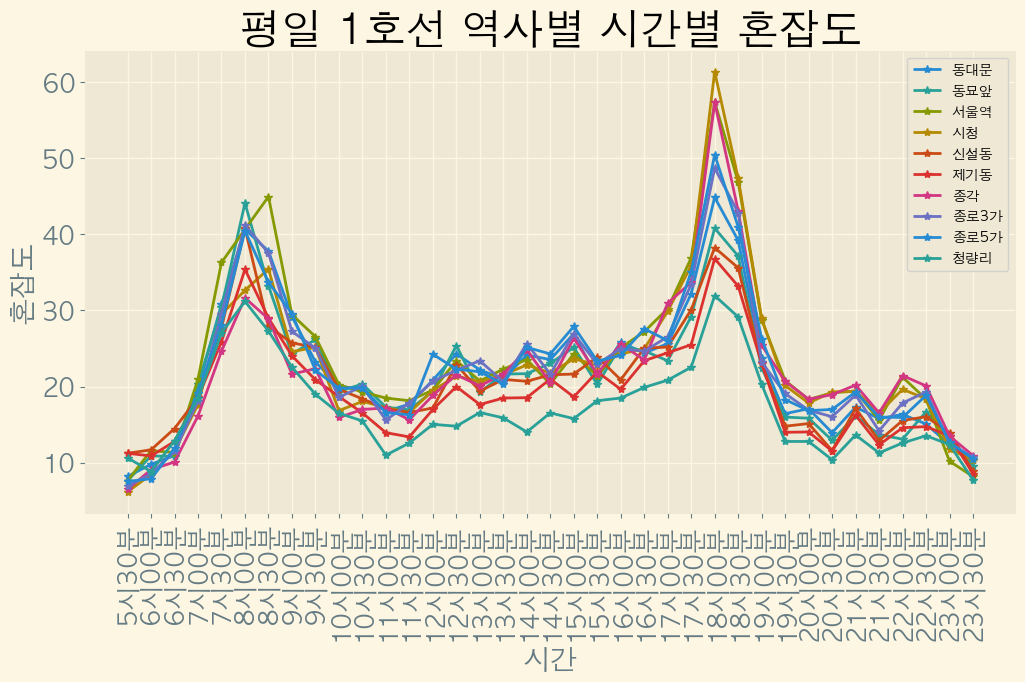

In [87]:
fig = plt.figure(figsize=(12,6))
plt.plot(first_station_data_T ,'-*')
plt.title('평일 1호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(first_station_data_T.columns)
plt.show()

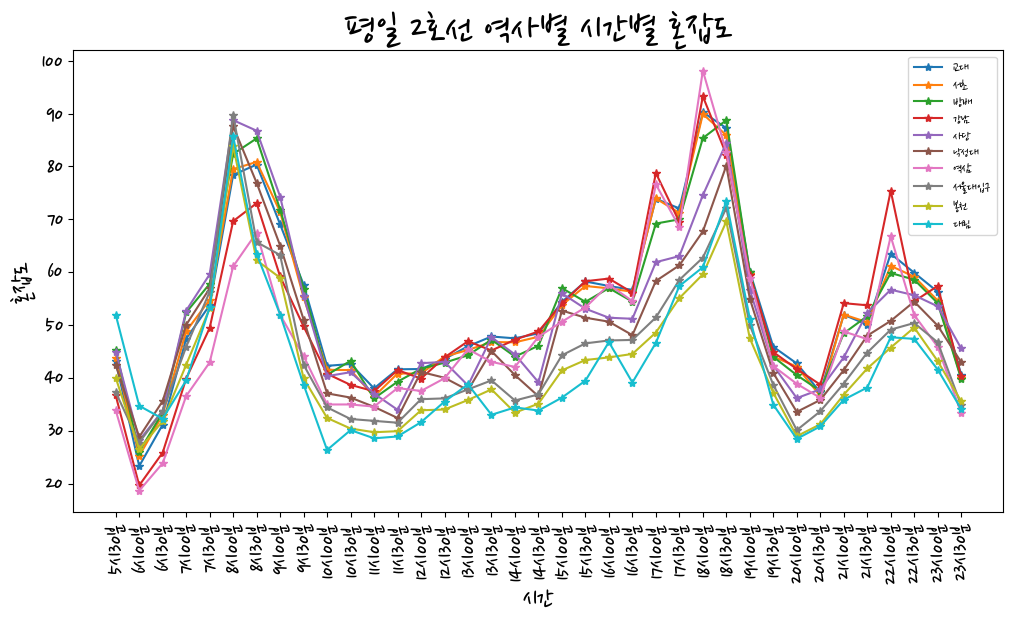

In [27]:
fig = plt.figure(figsize=(12,6))
plt.plot(second_station_data_T ,'-*')
plt.title('평일 2호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(second_station_data_T.columns)
plt.show()

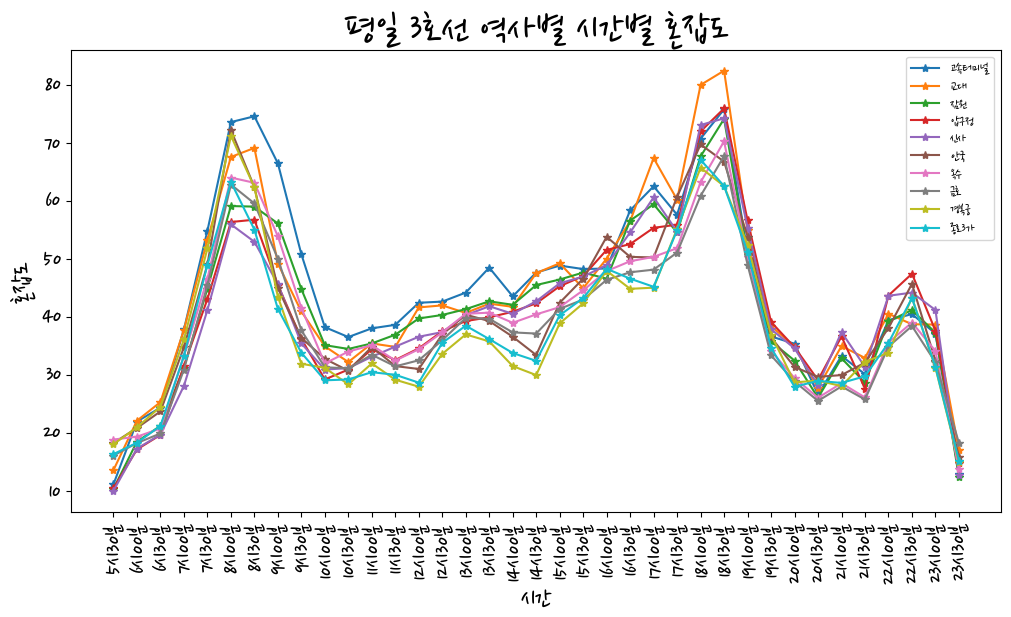

In [28]:
fig = plt.figure(figsize=(12,6))
plt.plot(third_station_data_T ,'-*')
plt.title('평일 3호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(third_station_data_T.columns)
plt.show()

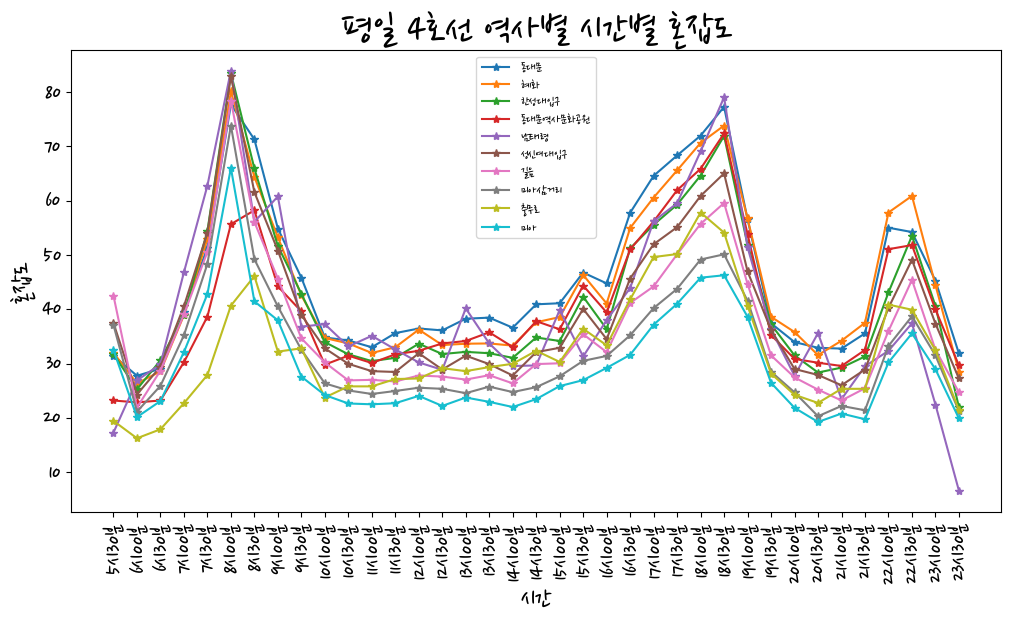

In [29]:
fig = plt.figure(figsize=(12,6))
plt.plot(fourth_station_data_T ,'-*')
plt.title('평일 4호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(fourth_station_data_T.columns)
plt.show()

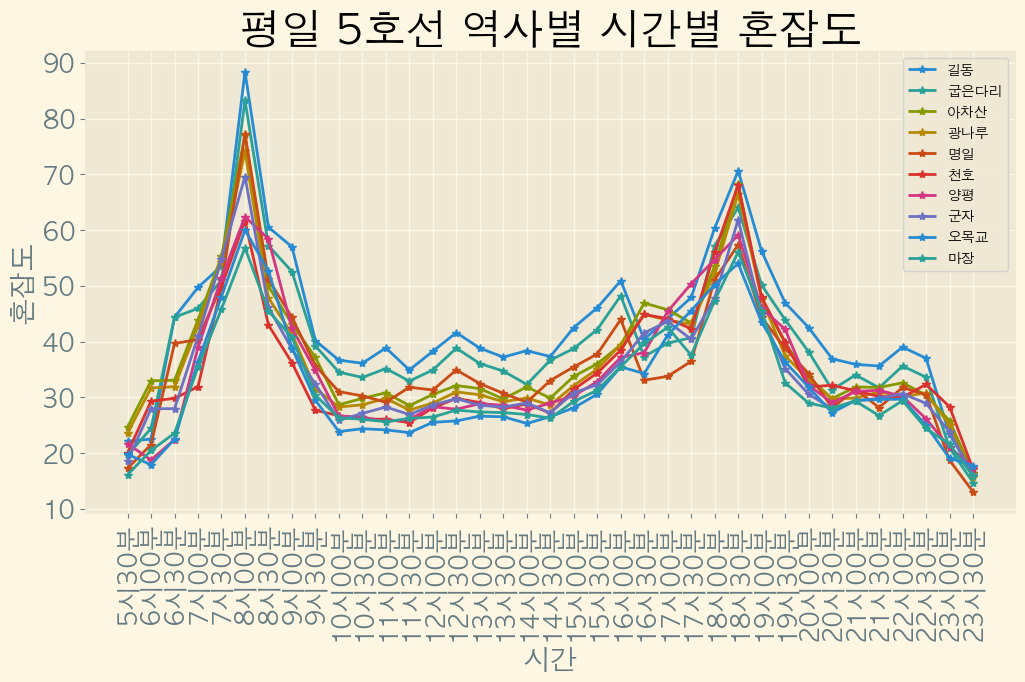

In [88]:
fig = plt.figure(figsize=(12,6))
plt.plot(fifth_station_data_T ,'-*')
plt.title('평일 5호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(fifth_station_data_T.columns)
plt.show()

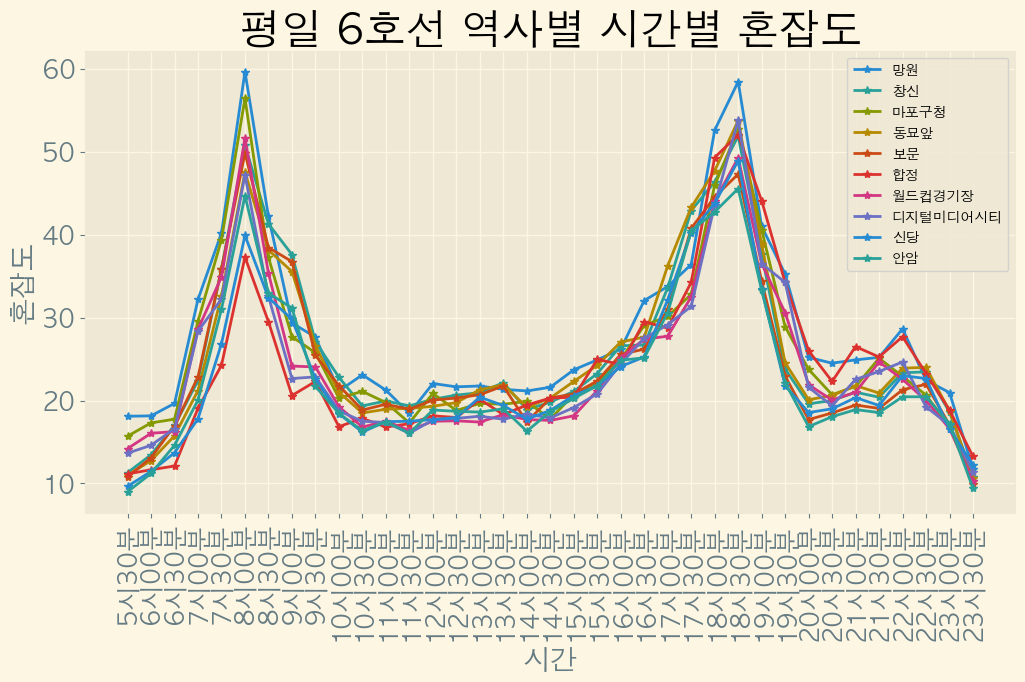

In [90]:
fig = plt.figure(figsize=(12,6))
plt.plot(sixth_station_data_T ,'-*')
plt.title('평일 6호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(sixth_station_data_T.columns)
plt.show()

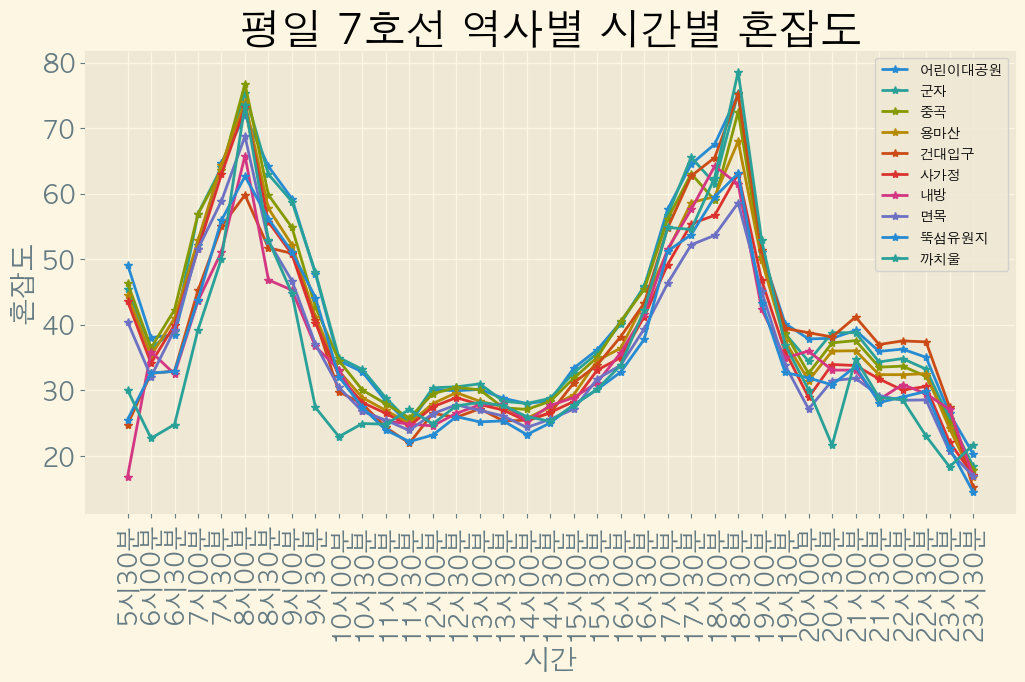

In [89]:
fig = plt.figure(figsize=(12,6))
plt.plot(seventh_station_data_T ,'-*')
plt.title('평일 7호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(seventh_station_data_T.columns)
plt.show()

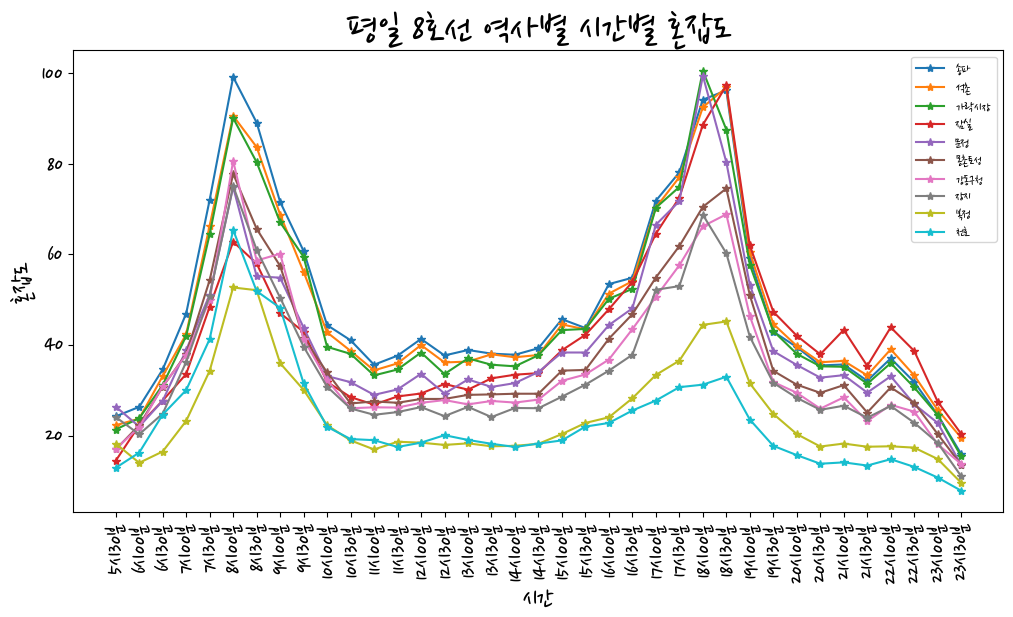

In [32]:
fig = plt.figure(figsize=(12,6))
plt.plot(eighth_station_data_T ,'-*')
plt.title('평일 8호선 역사별 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(eighth_station_data_T.columns)
plt.show()

In [33]:
line_data = df_subway_weekday.groupby(df_subway_.호선).mean() # 평일 호선별 시간 혼잡도 
line_data_sat = df_subway_sat.groupby(df_subway_.호선).mean() # 토요일 호선별 시간 혼잡도 
line_data_sun = df_subway_sun.groupby(df_subway_.호선).mean() # 일요일 호선별 시간 혼잡도
 

# 그래프를 그리기 위해 전치
line_data_T = line_data.T 
line_data_sat_T = line_data_sat.T
line_data_sun_T = line_data_sun.T

# 필요없는 행 지우기
del line_data_T[13],line_data_T[14],line_data_T[15]
del line_data_sat_T[13],line_data_sat_T[14],line_data_sat_T[15]
del line_data_sun_T[13],line_data_sun_T[14],line_data_sun_T[15]


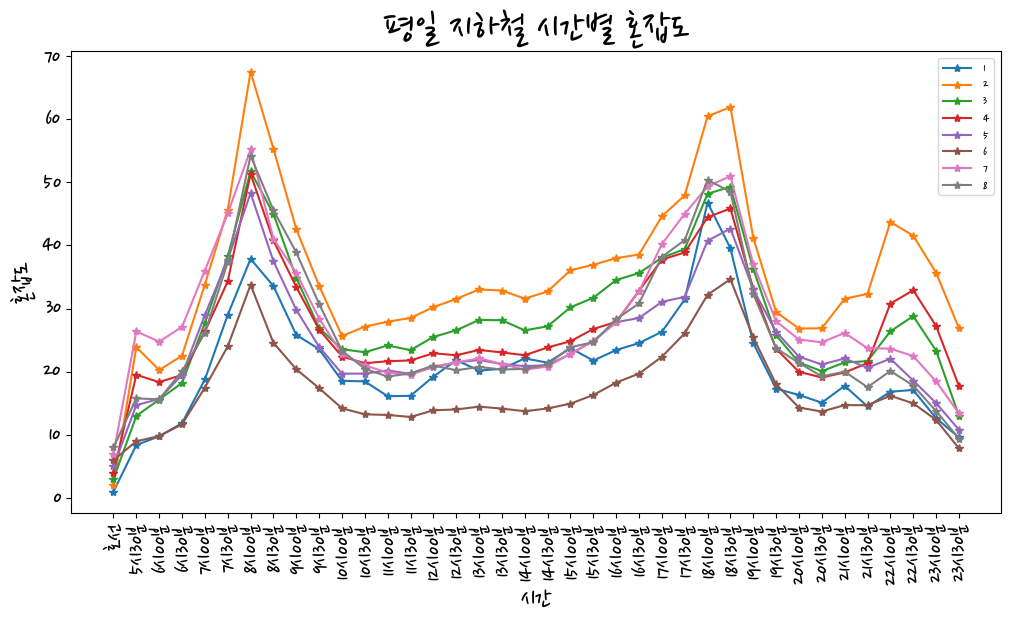

In [34]:
fig = plt.figure(figsize=(12,6))
plt.plot(line_data_T ,'-*')
plt.title('평일 지하철 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(line_data_T.columns)
plt.show()

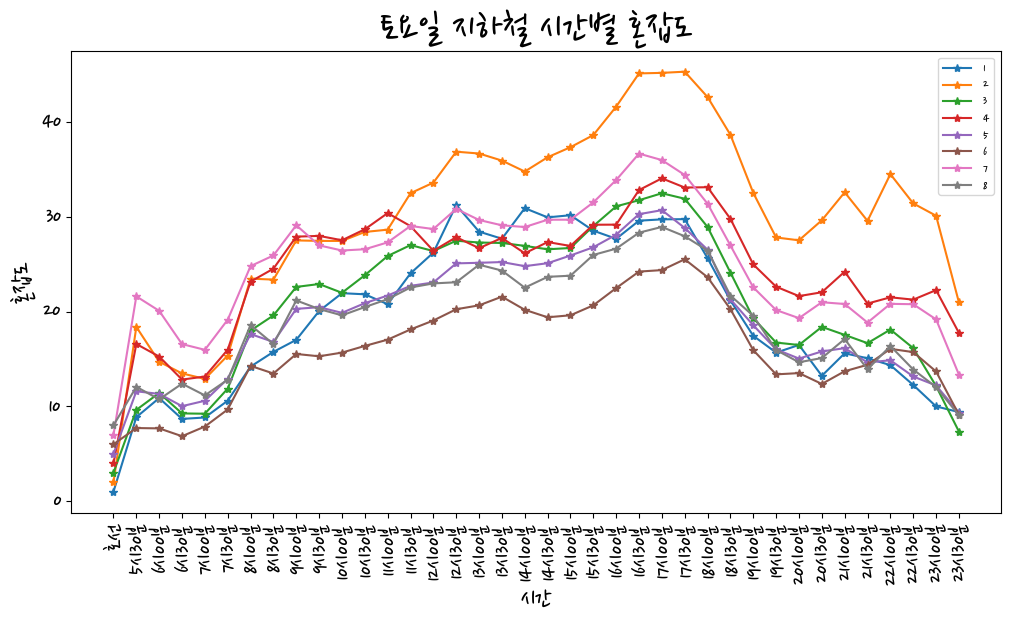

In [35]:
fig = plt.figure(figsize=(12,6))
plt.plot(line_data_sat_T ,'-*')
plt.title('토요일 지하철 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(line_data_sat_T.columns)
plt.show()

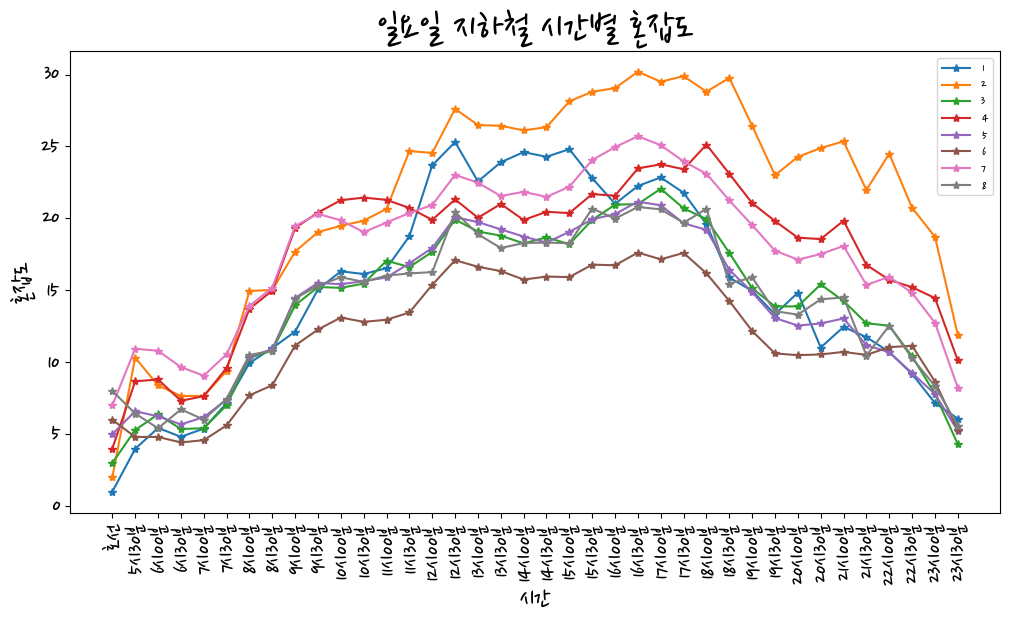

In [36]:
fig = plt.figure(figsize=(12,6))
plt.plot(line_data_sun_T ,'-*')
plt.title('일요일 지하철 시간별 혼잡도', size= 30)
plt.xticks(rotation = 90 ,size=18)
plt.yticks(size=18)
plt.xlabel('시간',size=20)
plt.ylabel('혼잡도',size=20)
plt.legend(line_data_sun_T.columns)
plt.show()

C:\Users\Playdata\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52384 (\N{HANGUL SYLLABLE CEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Pl

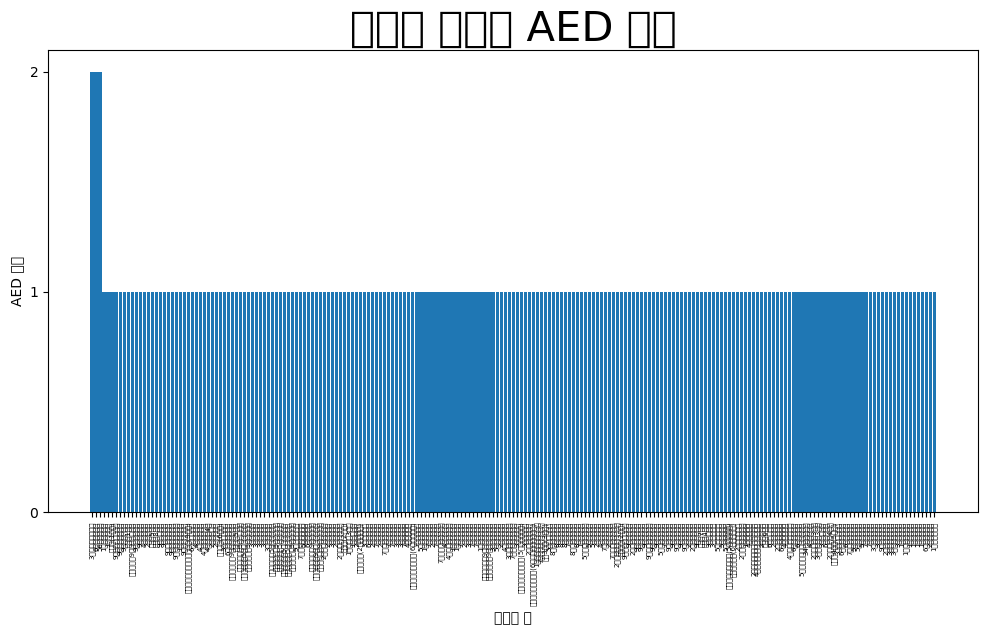

In [3]:
from collections import Counter # 중복된 갯수를 세기위한 라이브러리 가져오기 


# AED 위치 정보 파일 데이터 가져오기
df_AED = pd.read_csv('C:/python/mini porject/data/AED.csv',encoding='euc-kr')

# 원본 손상을 방지하기 위해 복사본 만들기
df_AED_ = df_AED.copy()

# 특정 컬럼 추출 
gg = df_AED_['설치기관명']

# 설치기관명 이름에서 공백 지우기
new_gg = [i.replace(' ', '') for i in gg]

# 중복된 값을 찾기 
new_gg_counter = Counter(new_gg)

# 데이터 프레임을 만들기 위한 시리즈 만들기
data = pd.Series(new_gg_counter)
data.name = '위치별 갯수'
data.index.name = '장소'


# 데이터 프레임 만들기
df_data = pd.DataFrame(data).sort_values(by='위치별 갯수', ascending=False)
df_data['장소'] = df_data.index
df_data

# 새로 만든 데이터 프레임에서 원하는 값만 추출하기 
new_data = df_data[df_data['장소'].str.contains("호선", na=False, case=False)]


# 그래프 만들기
fig = plt.figure(figsize=(12,6))
plt.bar(new_data['장소'], new_data['위치별 갯수'])
plt.title('지하철 역사별 AED 갯수',size=30)
plt.xlabel('지하철 역')
plt.ylabel('AED 갯수')
plt.xticks(rotation=90, size =5)
plt.yticks([0,1,2])
plt.show()


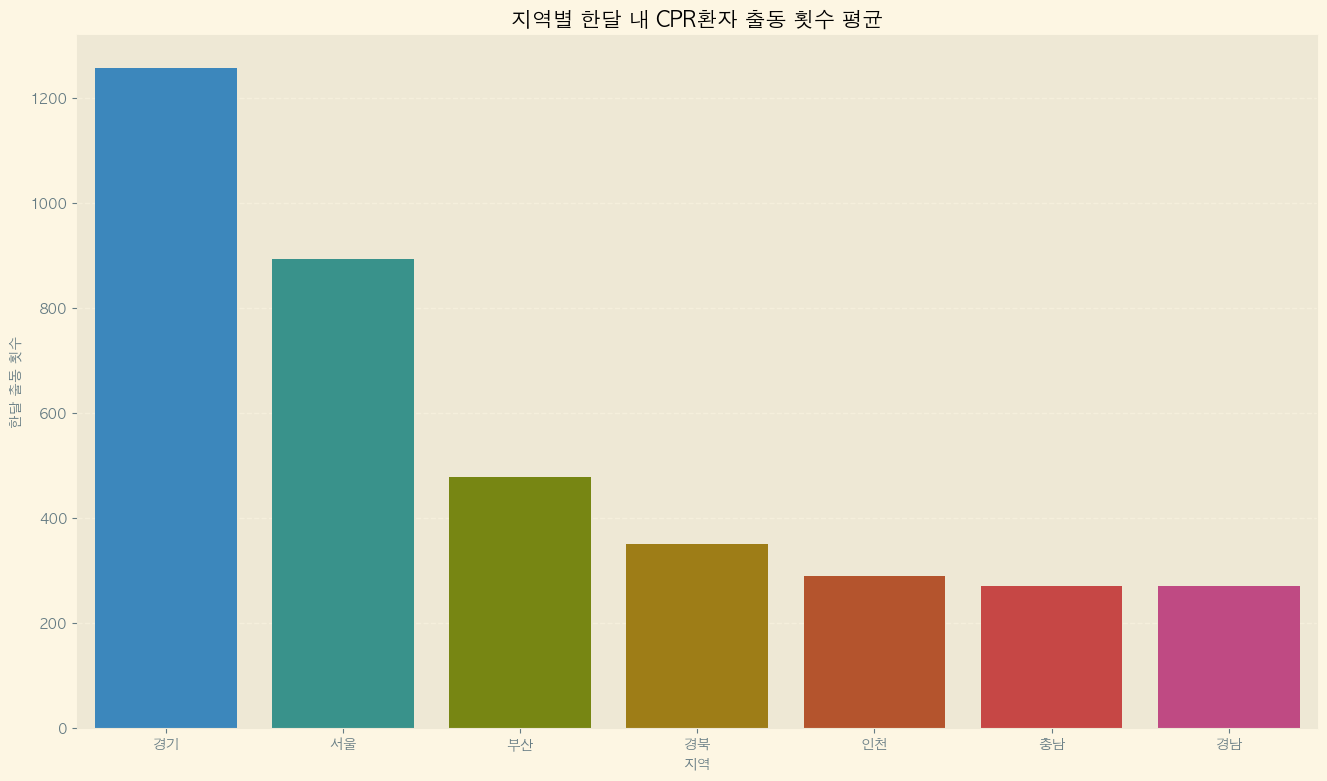

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,평균
시도본부,,,,,,,,,,,,,
서울,1057,806,923,845,892,792,828,828,856,910,954,1036,893.916667
부산,610,509,524,467,456,380,433,408,381,480,536,552,478.000000
대구,258,221,252,227,237,206,214,207,226,234,254,259,232.916667
인천,327,254,278,252,294,241,273,298,279,319,294,354,288.583333
광주,119,109,107,105,114,100,105,113,110,109,124,141,113.000000
대전,143,128,131,136,144,106,113,122,118,129,138,151,129.916667
울산,91,122,92,95,95,86,92,92,112,109,100,106,99.333333
세종,20,14,14,17,19,18,11,15,26,24,22,22,18.500000
경기,1361,1199,1274,1242,1302,1181,1247,1178,1155,1246,1345,1363,1257.750000


In [93]:
df_cpr = pd.read_csv('/Users/kimhoyoung/python/data/cpr.csv',encoding='euc-kr',index_col = '시도본부')
# fourth_mean = fourth_station_data.sort_values(by='평균', ascending= False).head(10)


df_cpr['평균'] = df_cpr.mean(axis=1)
df_cpr

df_cpr_mean = df_cpr.sort_values(by='평균' , ascending=False).head(7)
df_cpr_mean

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'purple']

fig = plt.figure(figsize=(16,9))
plt.title('지역별 한달 내 CPR환자 출동 횟수 평균', size=15)
sns.barplot(x=df_cpr_mean.index, y=df_cpr_mean.평균, errwidth=0.3 )
# plt.bar(df_cpr_mean.index, df_cpr_mean.평균, width= 0.5)
plt.grid(True, axis='y', alpha=0.5, linestyle = '--')
plt.xlabel('지역', size=10)
plt.ylabel('한달 출동 횟수', size=10)
plt.show()

df_cpr